# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [62]:
df = pd.read_csv('bank_transaction.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [63]:
dfc = pd.read_csv('bank_transaction.csv')
dfc.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
print('Dataset Information')
print(df.info())
print('==========================')
print('==========================')
print('Dataset Statistic')
print(df.describe())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

In [15]:
print('Jumlah Missing Value:')
print(df.isnull().sum())
print('==========================')
print('==========================')
print('Jumlah Duplikat:')
print(df.duplicated().sum())

Jumlah Missing Value:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
Jumlah Duplikat:
0


In [64]:
df_correlation = df.corr(numeric_only=True)
df_correlation

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


In [65]:
df_covariance = df.cov(numeric_only=True)
df_covariance

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,85232.609025,-133.056773,89.041404,-1.485935,-2.865947e+04
CustomerAge,-133.056773,316.562317,-22.326614,0.082059,2.220598e+04
TransactionDuration,89.041404,-22.326614,4894.927283,1.376202,1.522225e+03
LoginAttempts,-1.485935,0.082059,1.376202,0.363202,3.526259e+01
AccountBalance,-28659.468379,22205.984520,1522.225359,35.262585,1.521735e+07


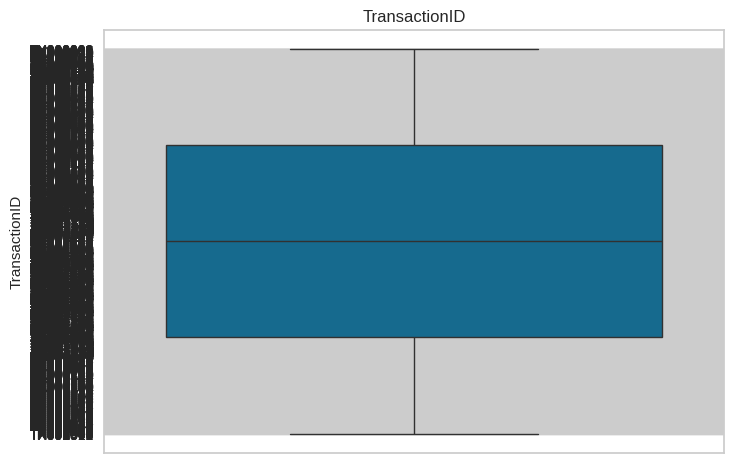

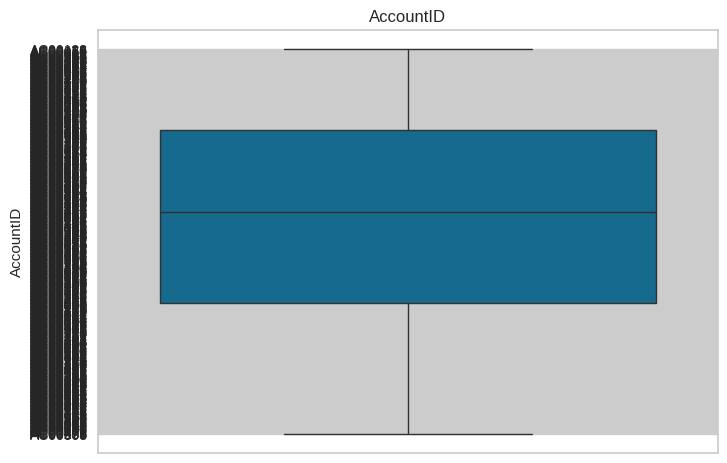

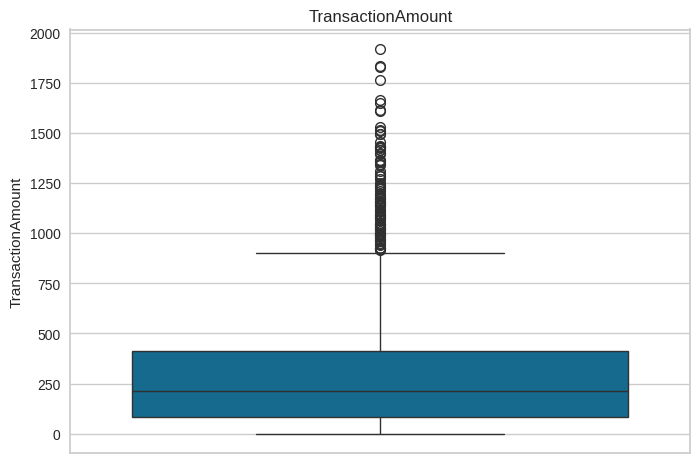

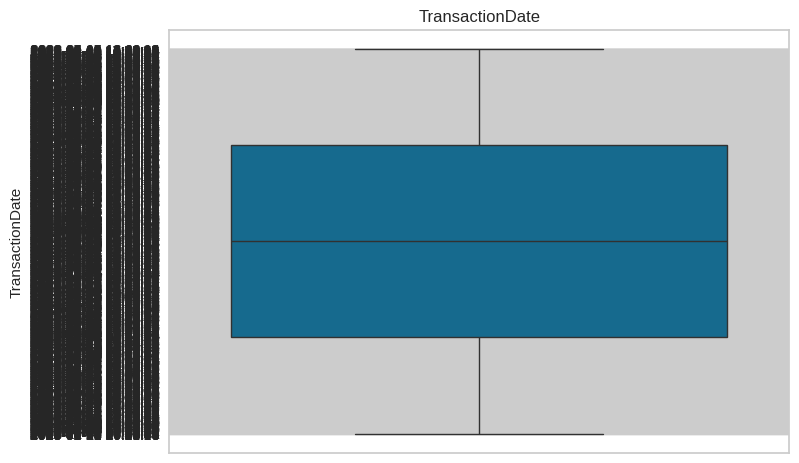

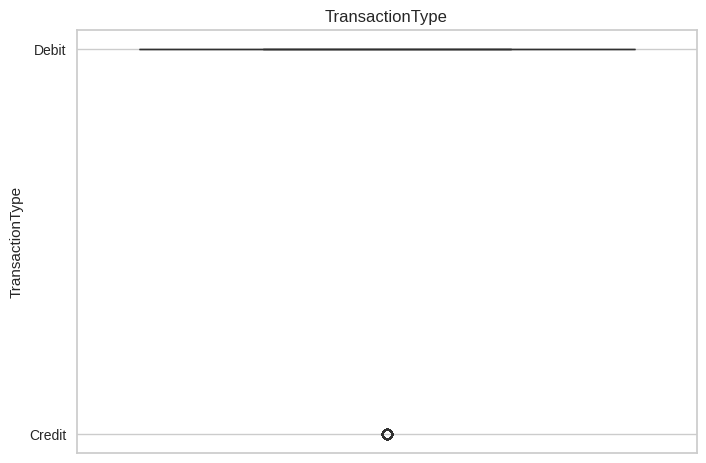

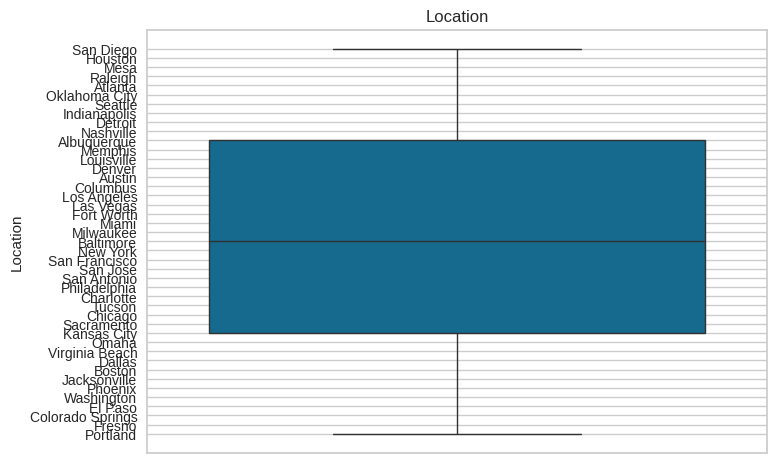

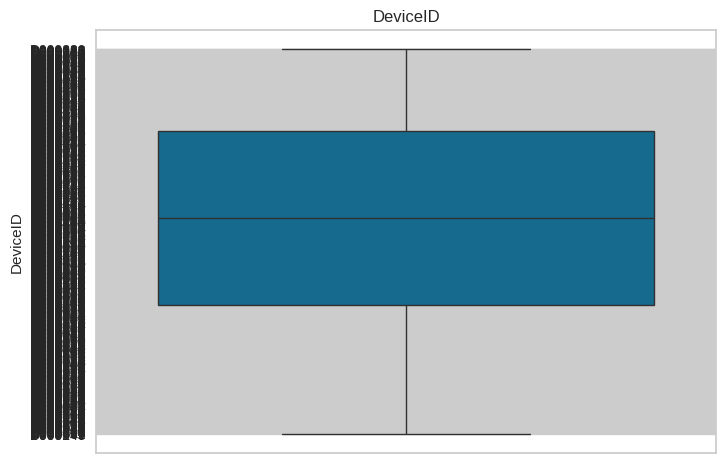

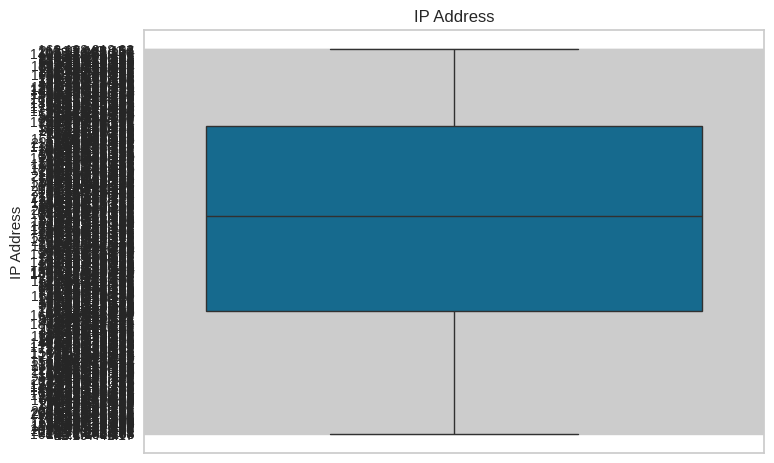

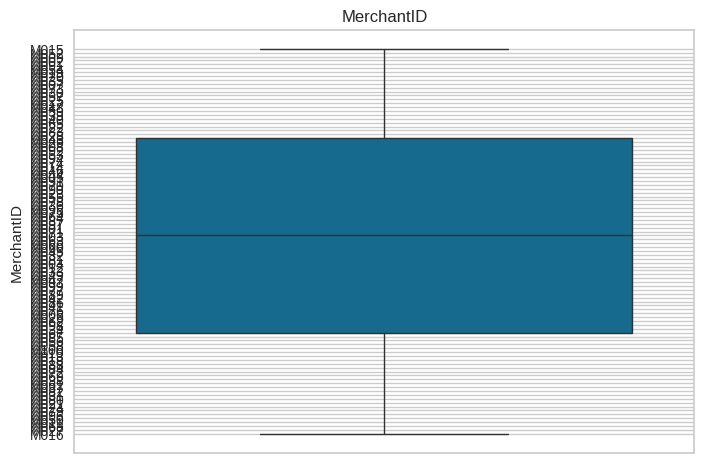

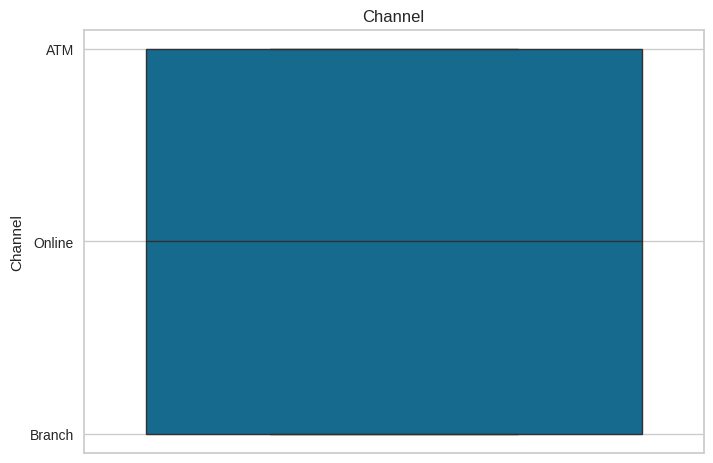

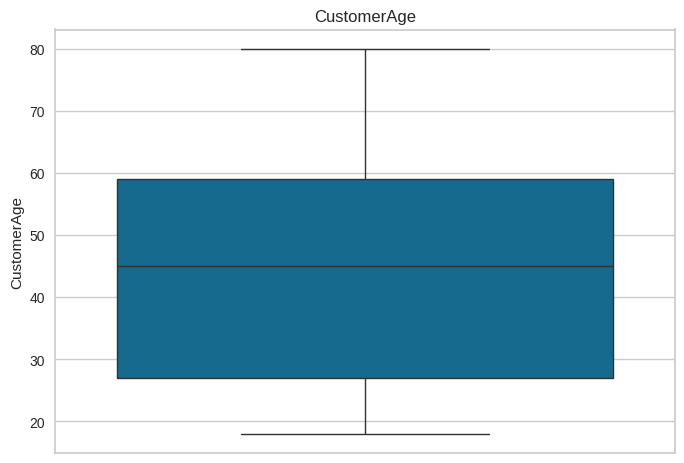

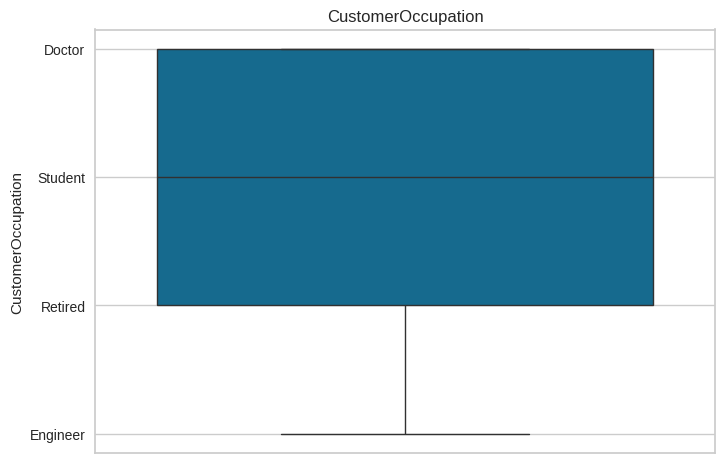

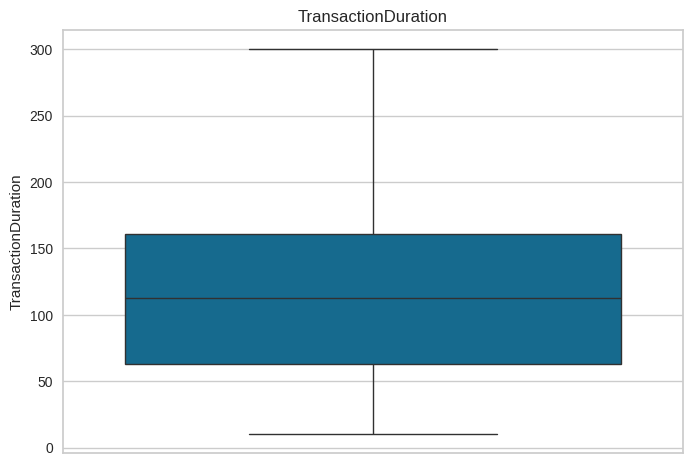

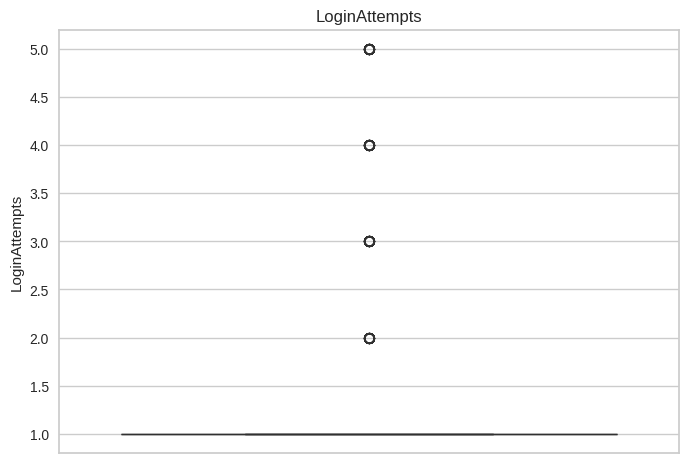

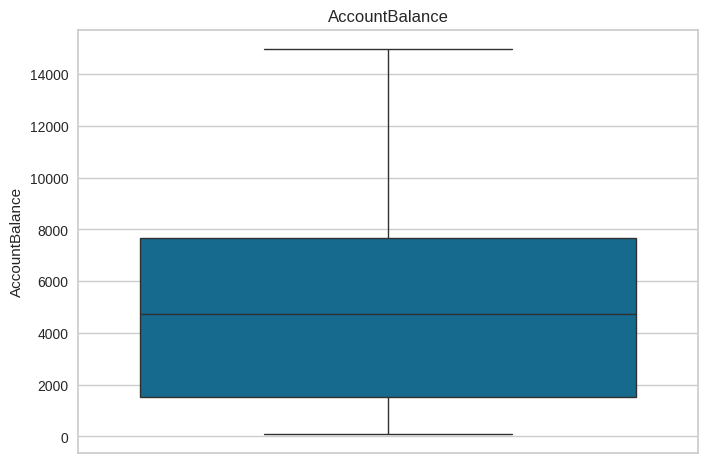

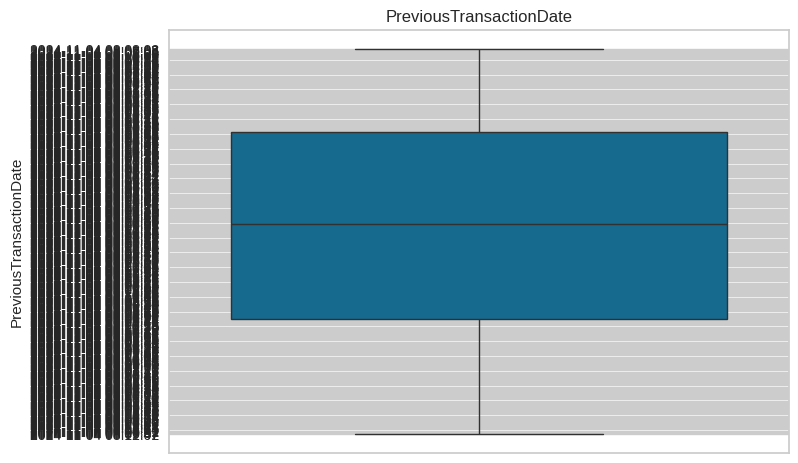

In [18]:
for feature in df.columns:
    sns.boxplot(df[feature], orient='vertical')
    plt.title(feature)
    plt.show()

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

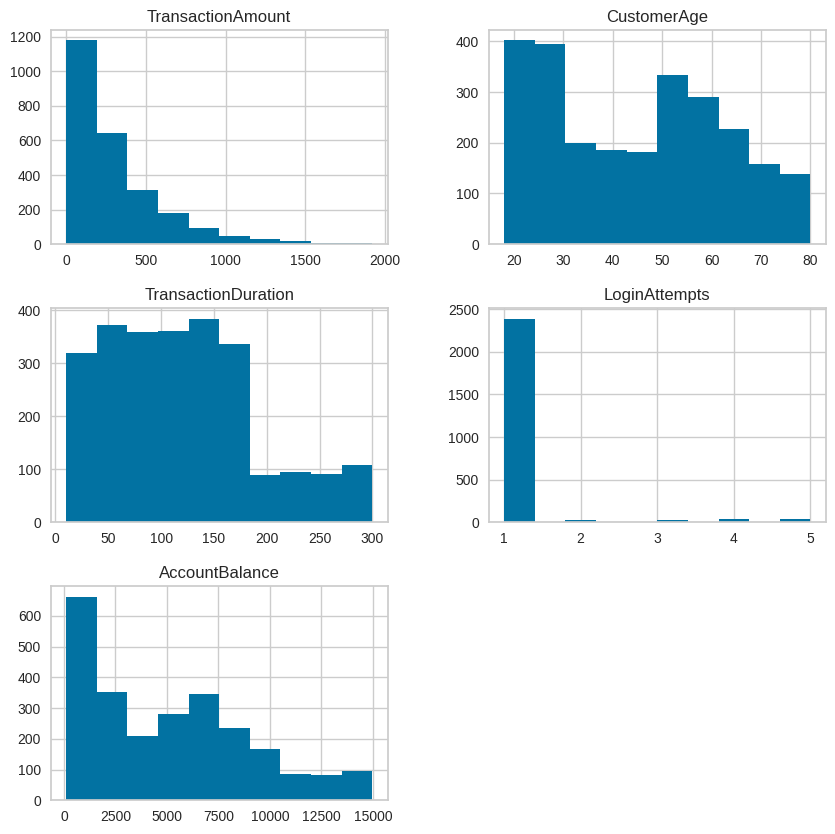

In [19]:
df.hist(figsize=(10,10))

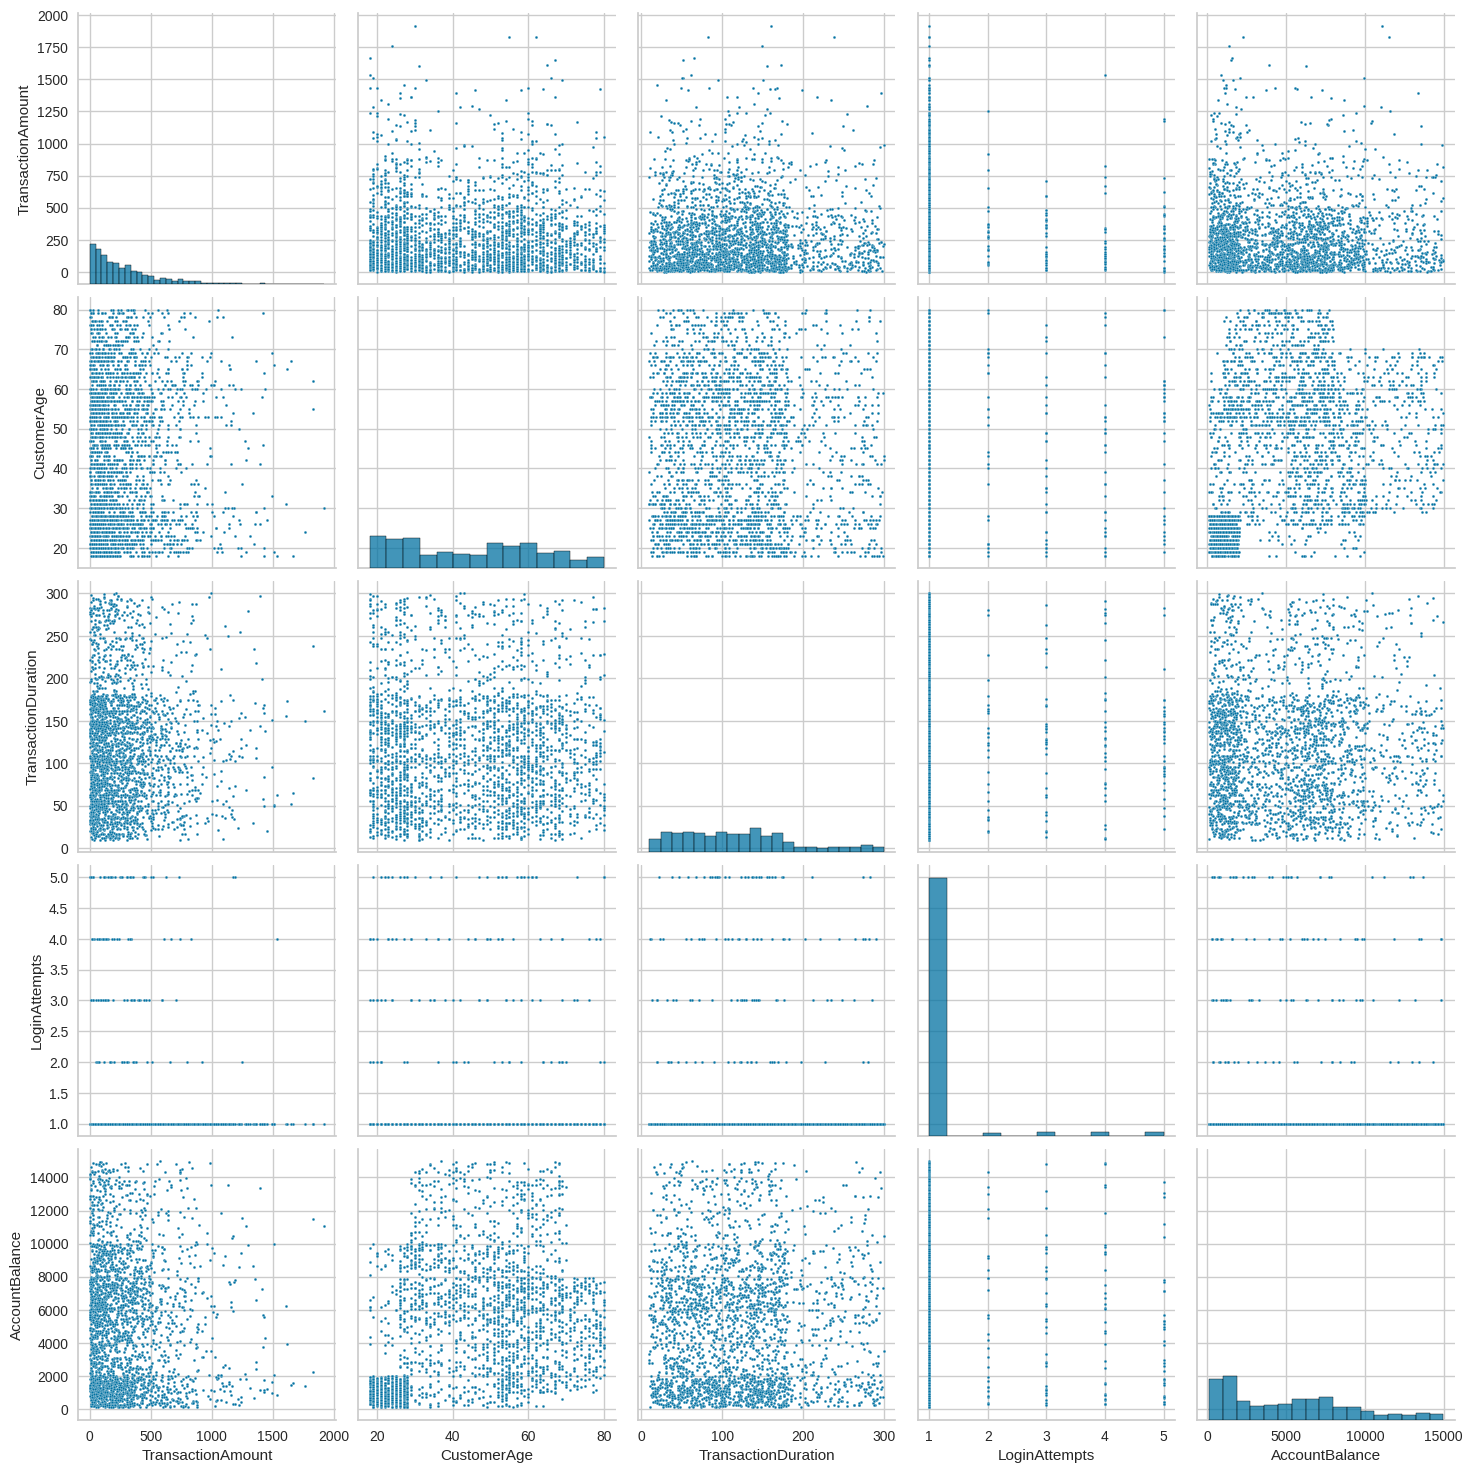

In [20]:
sns.pairplot(df, height = 3, plot_kws = {"s":4})

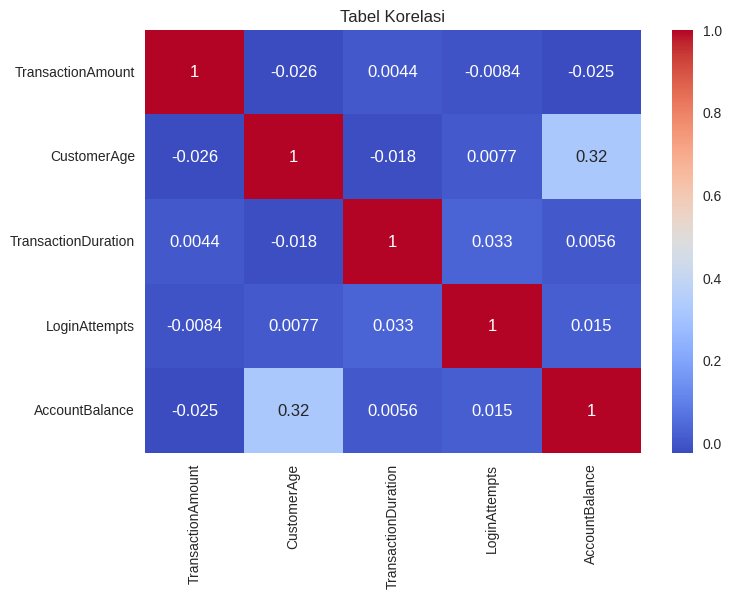

In [21]:
sns.heatmap(df_correlation, annot = True, cmap='coolwarm')
plt.title('Tabel Korelasi')
plt.show()

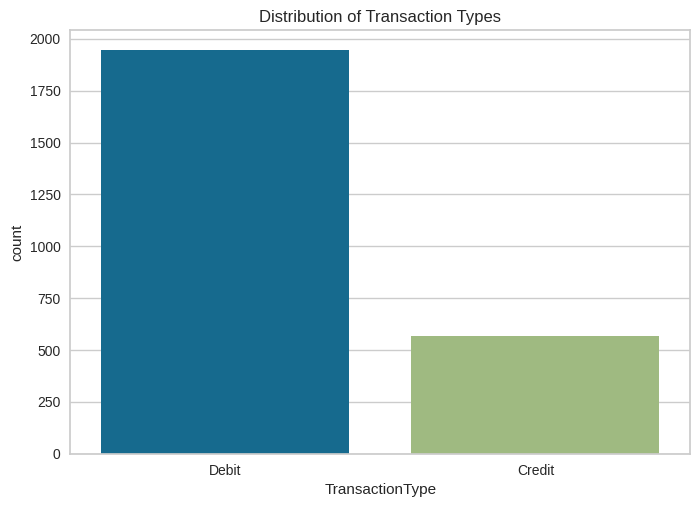

In [22]:
sns.countplot(x='TransactionType', hue='TransactionType' , data=df)
plt.title('Distribution of Transaction Types')
plt.show()

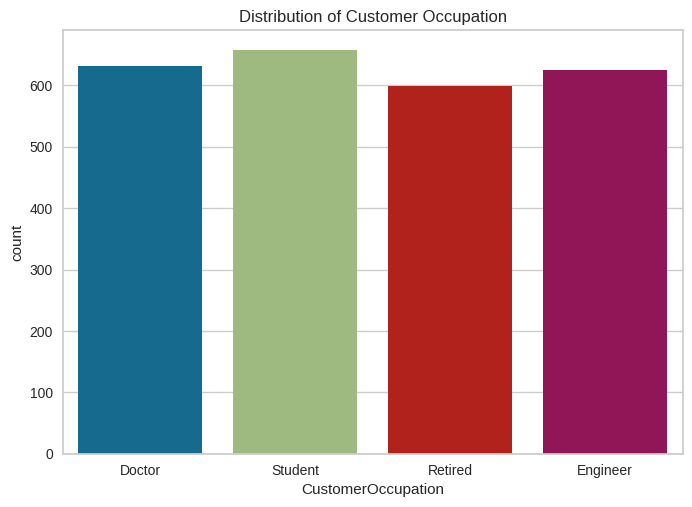

In [23]:
sns.countplot(x='CustomerOccupation', hue='CustomerOccupation' , data=df)
plt.title('Distribution of Customer Occupation')
plt.show()

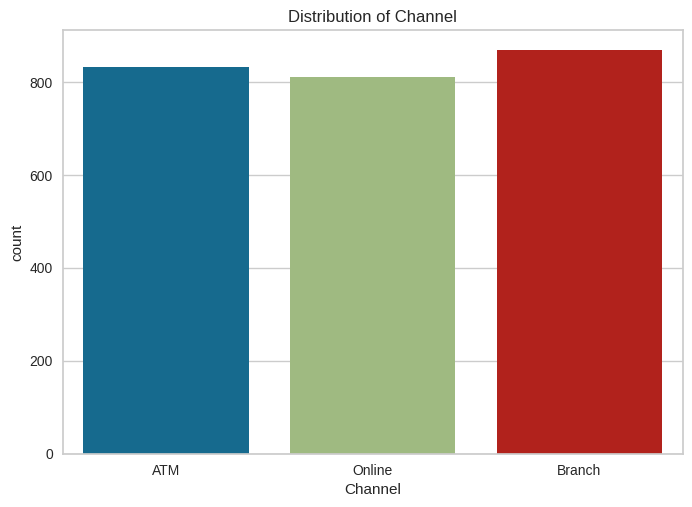

In [24]:
sns.countplot(x='Channel', hue='Channel' , data=df)
plt.title('Distribution of Channel')
plt.show()

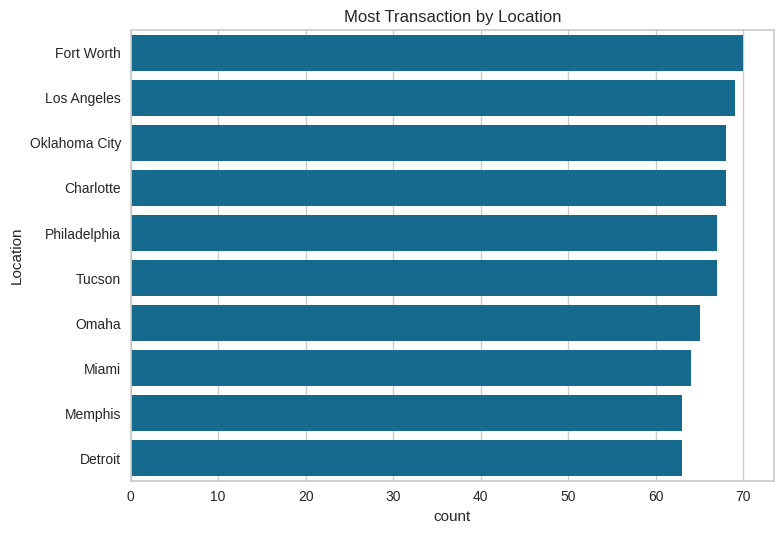

In [25]:
loc_dist = df['Location'].value_counts().index[:10]

sns.countplot(y='Location', data=df, order=loc_dist)

plt.title('Most Transaction by Location')
plt.tight_layout()
plt.show()

In [37]:
print(df['TransactionType'].value_counts())
print('==========================')
print(df['CustomerOccupation'].value_counts())
print('==========================')
print(df['Channel'].value_counts())
print('==========================')
print(df['Location'].value_counts())

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64
Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64
Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67
Omaha               65
Miami               64
Memphis             63
Detroit             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Seattle             61
Mesa                61
Atlanta             61
Fresno              60
Chicago             60
Colorado Springs    60
Jacksonville        60
San Jose            59
Raleigh             59
San Diego           59
San Antonio         59
Austin              59
Indianapolis        58
New York            58
San Francisco       57
Las Vegas           55
Nashville           55
Virginia Beach      5

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [26]:
# Menghapus data yang hilang (missing values)
df.dropna(inplace=True)

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [66]:
# Mengubah tipe data menjadi datetime
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["PreviousTransactionDate"] = pd.to_datetime(df["PreviousTransactionDate"])

In [67]:
# Drop kolom yang tdk digunakan
df.drop(['AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        2512 non-null   object        
 1   TransactionAmount    2512 non-null   float64       
 2   TransactionDate      2512 non-null   datetime64[ns]
 3   TransactionType      2512 non-null   object        
 4   Location             2512 non-null   object        
 5   Channel              2512 non-null   object        
 6   CustomerAge          2512 non-null   int64         
 7   CustomerOccupation   2512 non-null   object        
 8   TransactionDuration  2512 non-null   int64         
 9   LoginAttempts        2512 non-null   int64         
 10  AccountBalance       2512 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 216.0+ KB


In [68]:
# Deteksi Outlier
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identifikasi outlier di kolom numerik
numeric_cols = ['TransactionAmount', 'AccountBalance', 'LoginAttempts', 'CustomerAge', 'TransactionDuration']
outliers_summary = {}
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    outliers_summary[col] = len(outliers)

print('Outlier terdeteksi:', outliers_summary)

Outlier terdeteksi: {'TransactionAmount': 113, 'AccountBalance': 0, 'LoginAttempts': 122, 'CustomerAge': 0, 'TransactionDuration': 0}


In [69]:
# Label Encoding
categorical_cols = ['TransactionID', 'TransactionType', 'CustomerOccupation', 'Channel', 'Location']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Standarisasi kolom numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,TransactionID,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0,-0.971275,2023-04-11 16:29:14,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,1,0.269440,2023-06-27 16:44:19,1,15,0,1.311287,0,0.305314,-0.206794,2.216472
2,2,-0.586882,2023-07-10 18:16:08,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,3,-0.387456,2023-05-05 16:32:11,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,4,-0.973468,2023-10-16 17:51:24,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589


In [70]:
# Feature Selection
df_scaled = df.drop(['TransactionID', 'TransactionDate'], axis=1)
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [80]:
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit model ke df
kmeans_result = kmeans_model.fit(df_scaled)
labels = kmeans_result.labels_

In [81]:
# dfc merupakan dataframe yang memuat file csv yang masih mentah, Fitur dlm dfc masih lengkap
# Menambahkan label cluster di dfc dan df_scaled
dfc['Clusters'] = (labels+1)
df_scaled['Clusters'] = (labels+1)
dfc.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Clusters
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,3


In [77]:
# df_scaled hanya menggunakan fitur yang sudah diseleksi, kemudian ditambahkan fitur cluster
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Clusters
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,2
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,4
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,2
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,3


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [82]:
# Evaluasi model dg silhouette score
skor_silhouette_model = silhouette_score(df_scaled, labels)

print('Silhouette Score:', skor_silhouette_model)

Silhouette Score: 0.49693771246997837


Standart Scaler K-Elbow


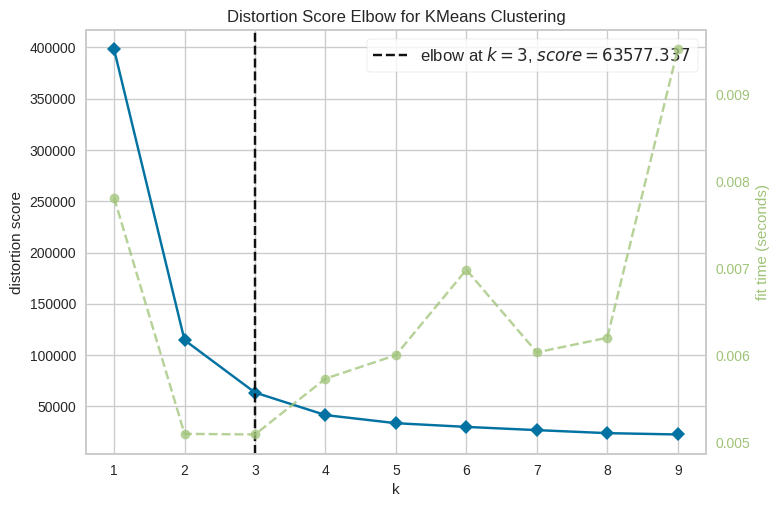

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
kmeans = KMeans()

##-- Visualisasi Elbow Cluster Untuk STD
print('Standart Scaler K-Elbow')
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_scaled)
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

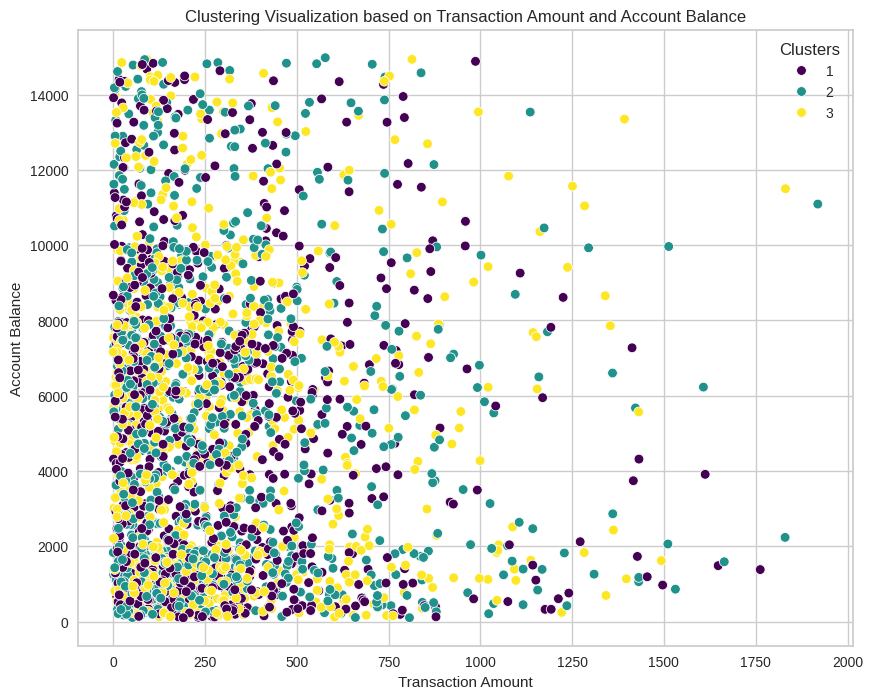

In [84]:
# Visualisasi Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TransactionAmount',
                y='AccountBalance',
                hue='Clusters',
                data=dfc,
                palette='viridis',
                )
plt.title('Clustering Visualization based on Transaction Amount and Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [92]:
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Clusters
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,2
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,1
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,2
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,3


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [ ]:
# Saya menggunakan copy an dataframe, sehingga tidak diperlukan inverse
# Dataframe final adalah dfc

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [87]:
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Clusters
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,2
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,1
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,2
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,3


In [88]:
dfc['Transaction Type Code'] = label_encoder.fit_transform(dfc['TransactionType'])
dfc['Channel Code'] = label_encoder.fit_transform(dfc['CustomerOccupation'])
dfc['Location Code'] = label_encoder.fit_transform(dfc['Location'])
# CO => Customer Occupation
dfc['CO Code'] = label_encoder.fit_transform(dfc['CustomerOccupation'])
dfc.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Clusters,Transaction Type Code,Channel Code,Location Code,CO Code
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,2,1,0,36,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,1,1,0,15,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:04,1,1,3,23,3
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:06,2,1,3,33,3
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:39,3,0,3,1,3


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TransactionAmount'].plot(kind='hist', bins=20, title='TransactionAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CustomerAge'].plot(kind='hist', bins=20, title='CustomerAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TransactionDuration'].plot(kind='hist', bins=20, title='TransactionDuration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('TransactionID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('AccountID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('TransactionDate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('TransactionType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='TransactionAmount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='TransactionAmount', y='CustomerAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='CustomerAge', y='TransactionDuration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='TransactionDuration', y='AccountBalance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TransactionAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TransactionID')):
  _plot_series(series, series_name, i)
  fig.legend(title='TransactionID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TransactionAmount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TransactionAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AccountID')):
  _plot_series(series, series_name, i)
  fig.legend(title='AccountID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TransactionAmount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TransactionAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TransactionDate')):
  _plot_series(series, series_name, i)
  fig.legend(title='TransactionDate', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TransactionAmount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TransactionAmount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TransactionType')):
  _plot_series(series, series_name, i)
  fig.legend(title='TransactionType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TransactionAmount')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['TransactionAmount'].plot(kind='line', figsize=(8, 4), title='TransactionAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['CustomerAge'].plot(kind='line', figsize=(8, 4), title='CustomerAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['TransactionDuration'].plot(kind='line', figsize=(8, 4), title='TransactionDuration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AccountID'].value_counts()
    for x_label, grp in _df_20.groupby('TransactionID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TransactionID')
_ = plt.ylabel('AccountID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TransactionDate'].value_counts()
    for x_label, grp in _df_21.groupby('AccountID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AccountID')
_ = plt.ylabel('TransactionDate')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TransactionType'].value_counts()
    for x_label, grp in _df_22.groupby('TransactionDate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TransactionDate')
_ = plt.ylabel('TransactionType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location'].value_counts()
    for x_label, grp in _df_23.groupby('TransactionType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TransactionType')
_ = plt.ylabel('Location')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['TransactionID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='TransactionID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['AccountID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='AccountID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['TransactionDate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='TransactionDate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['TransactionType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='TransactionType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [90]:
from scipy import stats

def analyze_clusters(X, k):
  print("Analisis Karakteristik Setiap Cluster:")
  for cluster_id in range(k):
    cluster_data = dfc[dfc['Clusters']==cluster_id+1]


    # Hitung nilai rata2 fitur
    mean_trans_amount = np.mean(cluster_data['TransactionAmount'])
    mode_trans_type = stats.mode(cluster_data['Transaction Type Code'])
    mode_location = stats.mode(cluster_data['Location Code'])

    mode_channel = stats.mode(cluster_data['Channel Code'])
    median_cust_age = np.median(cluster_data['CustomerAge'])
    mode_occupation = stats.mode(cluster_data['CO Code'])

    mean_trans_duration = np.mean(cluster_data['TransactionDuration'])
    mean_login_attempts = np.mean(cluster_data['LoginAttempts'])
    mean_acc_balance  = np.mean(cluster_data['AccountBalance'])


    # Menampilkan hasilnya
    print(f"\nCluster {cluster_id + 1}:")
    print(f"Average Transaction Amount: {mean_trans_amount:.2f}")
    print(f"Modus Transaction Type Code: {mode_trans_type}")
    print(f"Modus Location Code : {mode_location}")

    print(f"Average Channel: {mode_channel}")
    print(f"Average Customer Age : {median_cust_age}")
    print(f"Average Occupation: {mode_occupation}")

    print(f"Average Transaction Duration : {mean_trans_duration:.2f}")
    print(f"Average Login Attempts : {mean_login_attempts:.2f}")
    print(f"Average Account Balance : {mean_acc_balance:.2f}")


analyze_clusters(dfc, 3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Average Transaction Amount: 291.64
Modus Transaction Type Code: ModeResult(mode=np.int64(1), count=np.int64(641))
Modus Location Code : ModeResult(mode=np.int64(20), count=np.int64(69))
Average Channel: ModeResult(mode=np.int64(1), count=np.int64(225))
Average Customer Age : 46.0
Average Occupation: ModeResult(mode=np.int64(1), count=np.int64(225))
Average Transaction Duration : 121.42
Average Login Attempts : 1.15
Average Account Balance : 5018.11

Cluster 2:
Average Transaction Amount: 303.66
Modus Transaction Type Code: ModeResult(mode=np.int64(1), count=np.int64(665))
Modus Location Code : ModeResult(mode=np.int64(28), count=np.int64(68))
Average Channel: ModeResult(mode=np.int64(3), count=np.int64(235))
Average Customer Age : 43.0
Average Occupation: ModeResult(mode=np.int64(3), count=np.int64(235))
Average Transaction Duration : 118.33
Average Login Attempts : 1.10
Average Account Balance : 5120.83

Cluster 3:
Average Transaction

Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Rata-rata **transaksi dikeluarkan** adalah **291.64**
- Transaksi paling banyak menggunakan **transaksi tipe** **Debit**
- **Lokasi** paling banyak dilakukannya transaksi adalah di **Los Angeles**
- **Channel** paling banyak digunakan adalah melalui **Branch**
- Nilai tengah **umur** **customer** adalah **46 tahun**
- Kebanyakan **pekerjaan customer** adalah **Engineer**
- Rata-rata **durasi transaksi** adalah **121.42**
- Rata-rata **percobaan login** adalah **1.15**
- Rata-rata **saldo akun** adalah **5018.11**
<br> **Analisis:**
<br> Rata-rata saldo akun dan transaksi dikeluarkan merupakan yang paling rendah di antara dua cluster yang lain. Namun, rata-rata durasi transaksi yang paling tinggi. Ketiga hal tersebut kemungkinan karena kebanyakan customer bertransaksi melalui Branch.     
2. Cluster 2:
- Rata-rata **transaksi dikeluarkan** adalah **303.66**
- Transaksi paling banyak menggunakan **transaksi tipe** **ATM**
- **Lokasi** paling banyak dilakukannya transaksi adalah di **Oklahoma City**
- **Channel** paling banyak digunakan adalah melalui **Online**
- Nilai tengah **umur customer** adalah **43 tahun**
- Kebanyakan **pekerjaan customer** adalah **Student**
- Rata-rata **durasi transaksi** adalah **118.33**
- Rata-rata **percobaan login** adalah **1.10**
- Rata-rata **saldo akun** adalah **5120.83**
<br> **Analisis:**
<br> Rata-rata saldo akun merupakan yang tertinggi kedua. Namun, transaksi dikeluarkan merupakan yang paling tinggi. Ini artinya customer pada cluster 2 memiliki daya beli yang cukup baik. Kebanyakan customer menggunakan transaksi melalui Online. Mengingat kemudahan dalam bertransaksi online, sehingga memudahkan customer untuk bertransaksi dan durasi transaksi yang paling kecil dari cluster yang lain.  
3. Cluster 3:
- Rata-rata **transaksi dikeluarkan** adalah **297.17**
- Transaksi paling banyak menggunakan **transaksi tipe ATM**
- **Lokasi** paling banyak dilakukannya transaksi adalah di **Fort Worth**
- **Channel** paling banyak digunakan adalah melalui **Online**
- Nilai tengah **umur customer** adalah **46 tahun**
- Kebanyakan **pekerjaan customer** adalah **Student**
- Rata-rata **durasi transaksi** adalah **119.23**
- Rata-rata **percobaan login** adalah **1.12**
- Rata-rata **saldo akun** adalah **5206.75**
<br> **Analisis:**
<br> Rata-rata saldo akun tertinggi dari cluster yang lain. Rata-rata transaksi dikeluarkan paling tinggi kedua yang artinya customer dengan saldo yang cukup tinggi juga memiliki daya beli yang baik seperti pada cluster 1. Hal ini, bisa jadi karena customer pada cluster 3, kebanyakan bertransaksi melalui Online, sehingga lebih mudah untuk mengeluarkan uang.

<br> Pola yang bisa dimanfaatkan dari hasil analisis tersebut adalah:
<br> 1. Meningkatkan layanan Branch untuk pengalaman customer yang lebih baik
<br> 2. Mengedukasi tentang layanan Online sehingga dapat meningkatkan transaksi dikeluarkan
<br> 3. Meningkatkan layanan digital untuk pengalaman customer Online yang lebih baik
<br> 4. Memberikan penawaran bunga tinggi untuk yang ingin mendepositokan saldonya, sehingga bisa meningkatkan keinginan customer untuk menabung
<br> 5. Memberikan penawaran khusus seperti diskon atau cashback untuk mereka yang bertransaksi Online sehingga diharapkan bisa meningkatkan loyalitas dan good experiencenya kepada Bank

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [91]:
dfc.to_csv('clustering.csv', index=False)

from google.colab import files
files.download('clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>